# 1. Probability Definition

According to the probability definition:

$$P(A) = \lim_{n \to +\infty} \frac{n_A}{n}$$

We want to examine the validity of this equation empirically. This measurement is just intuitive and does not prove anything (not reliable); but the goal of doing statistical experiments using R language will lead us to this purpose.

In this example from Lecture 1, consider:
<br/>
Example: We roll two dice and want to calculate the probability that their sum is 7.

We know that each die has 6 faces and by the multiplication principle, the number of possible outcomes for rolling two dice is $6 \times 6 = 36$. Our desired outcomes will be those where we observe
$(x,y)$
such that
$x+y=7$.
Therefore, the set of our desired outcomes will be:
$$\{(1,6),(2,5),(3,4),(4,3),(5,2),(6,1)\}$$
Assuming the experiment is fair and the dice are not loaded, the probabilities of each face of a die are equally likely to come up. Therefore, the probabilities of observing each of the 36 possible pairs for the dice rolls are also equally likely. Thus, we can use the classical definition of probability and conclude that the probability of observing our desired outcome is
$\frac{6}{36} = 0.1667$.

Now we estimate this probability using the limit definition of probability. First we need to set up the sample space for this example:

In [27]:
dice_possible_observations <- seq(1, 6)
dice_observation_chance_to_appear <- rep(1 / 6, 6)


Sampling is the process of selecting a subset of the population. This is done to recognize or estimate the population parameters. To sample in R, we use the sample function.

In [28]:
sample_of_n_dice <- function(n) {
  sample(
    x = dice_possible_observations,
    size = n,
    replace = TRUE,
    prob = dice_observation_chance_to_appear
  )
}

sum_of_n_dice <- function(n) {
  sum(sample_of_n_dice(n))
}


Now in the next two blocks we simulate the experiment process.

In [29]:
rownames <- seq(2, 12)
colnames <- "n"
observations <- matrix(
  0,
  nrow = 11,
  byrow = TRUE,
  dimnames = list(rownames, colnames)
)


In [30]:
observations[, "n"] <- 0
for (i in 1:1000) {
  obs <- sum_of_n_dice(2)
  observations[toString(obs), "n"] <- observations[toString(obs), "n"] + 1
}
result <- observations["7", "n"] / sum(observations[, "n"])
print(result)

[1] 0.161


Repeat the main experiment loop with 100 and 100,000 repeats,  and record your observations. Analyze these observations. 


In this analysis, in addition to what you think is appropriate, consider the following:

- Compare the accuracy of this experiment with a sample size of 100 versus a sample size of 100,000 to the actual probability value that we calculated theoretically at the beginning of this section. The reason for this difference is important.

Answer: 100,000 repeats is closer to the theoretically calculated value, and the reason is that as the number of samples increases, the variance of the population becomes smaller.

<font color='yellow'  background-color: blue>
Note) Loops are used in the codes provided in this section. You should be careful that using loops is not desirable in general and should be avoided. In this section, this point is ignored for the purpose of getting acquainted with the R language, but from the next section, the use of this loop is avoided as much as possible.

The reason for this avoidance is that statistical calculations and the like can be done in parallel in R (and Python) but when loops are used, this advantage is lost and as a result, program runtimes become very long. Alternative methods that you will become familiar with later are the use of data frames and matrices and operators specific to them. Loops should only be used when the desired simulation is truly time dependent and the calculations of each step require the previous step. In the next exercise section, you are not allowed to use loops and must use a function for iterative calculations.
</font>

<font color='green'>
<h3><font color='green'>If you're eager to see more, continue:</font></h3>
We want to plot the above experiment step by step to see the convergence of the experimental result to the true value over time (by increasing the number of samples).

</font>

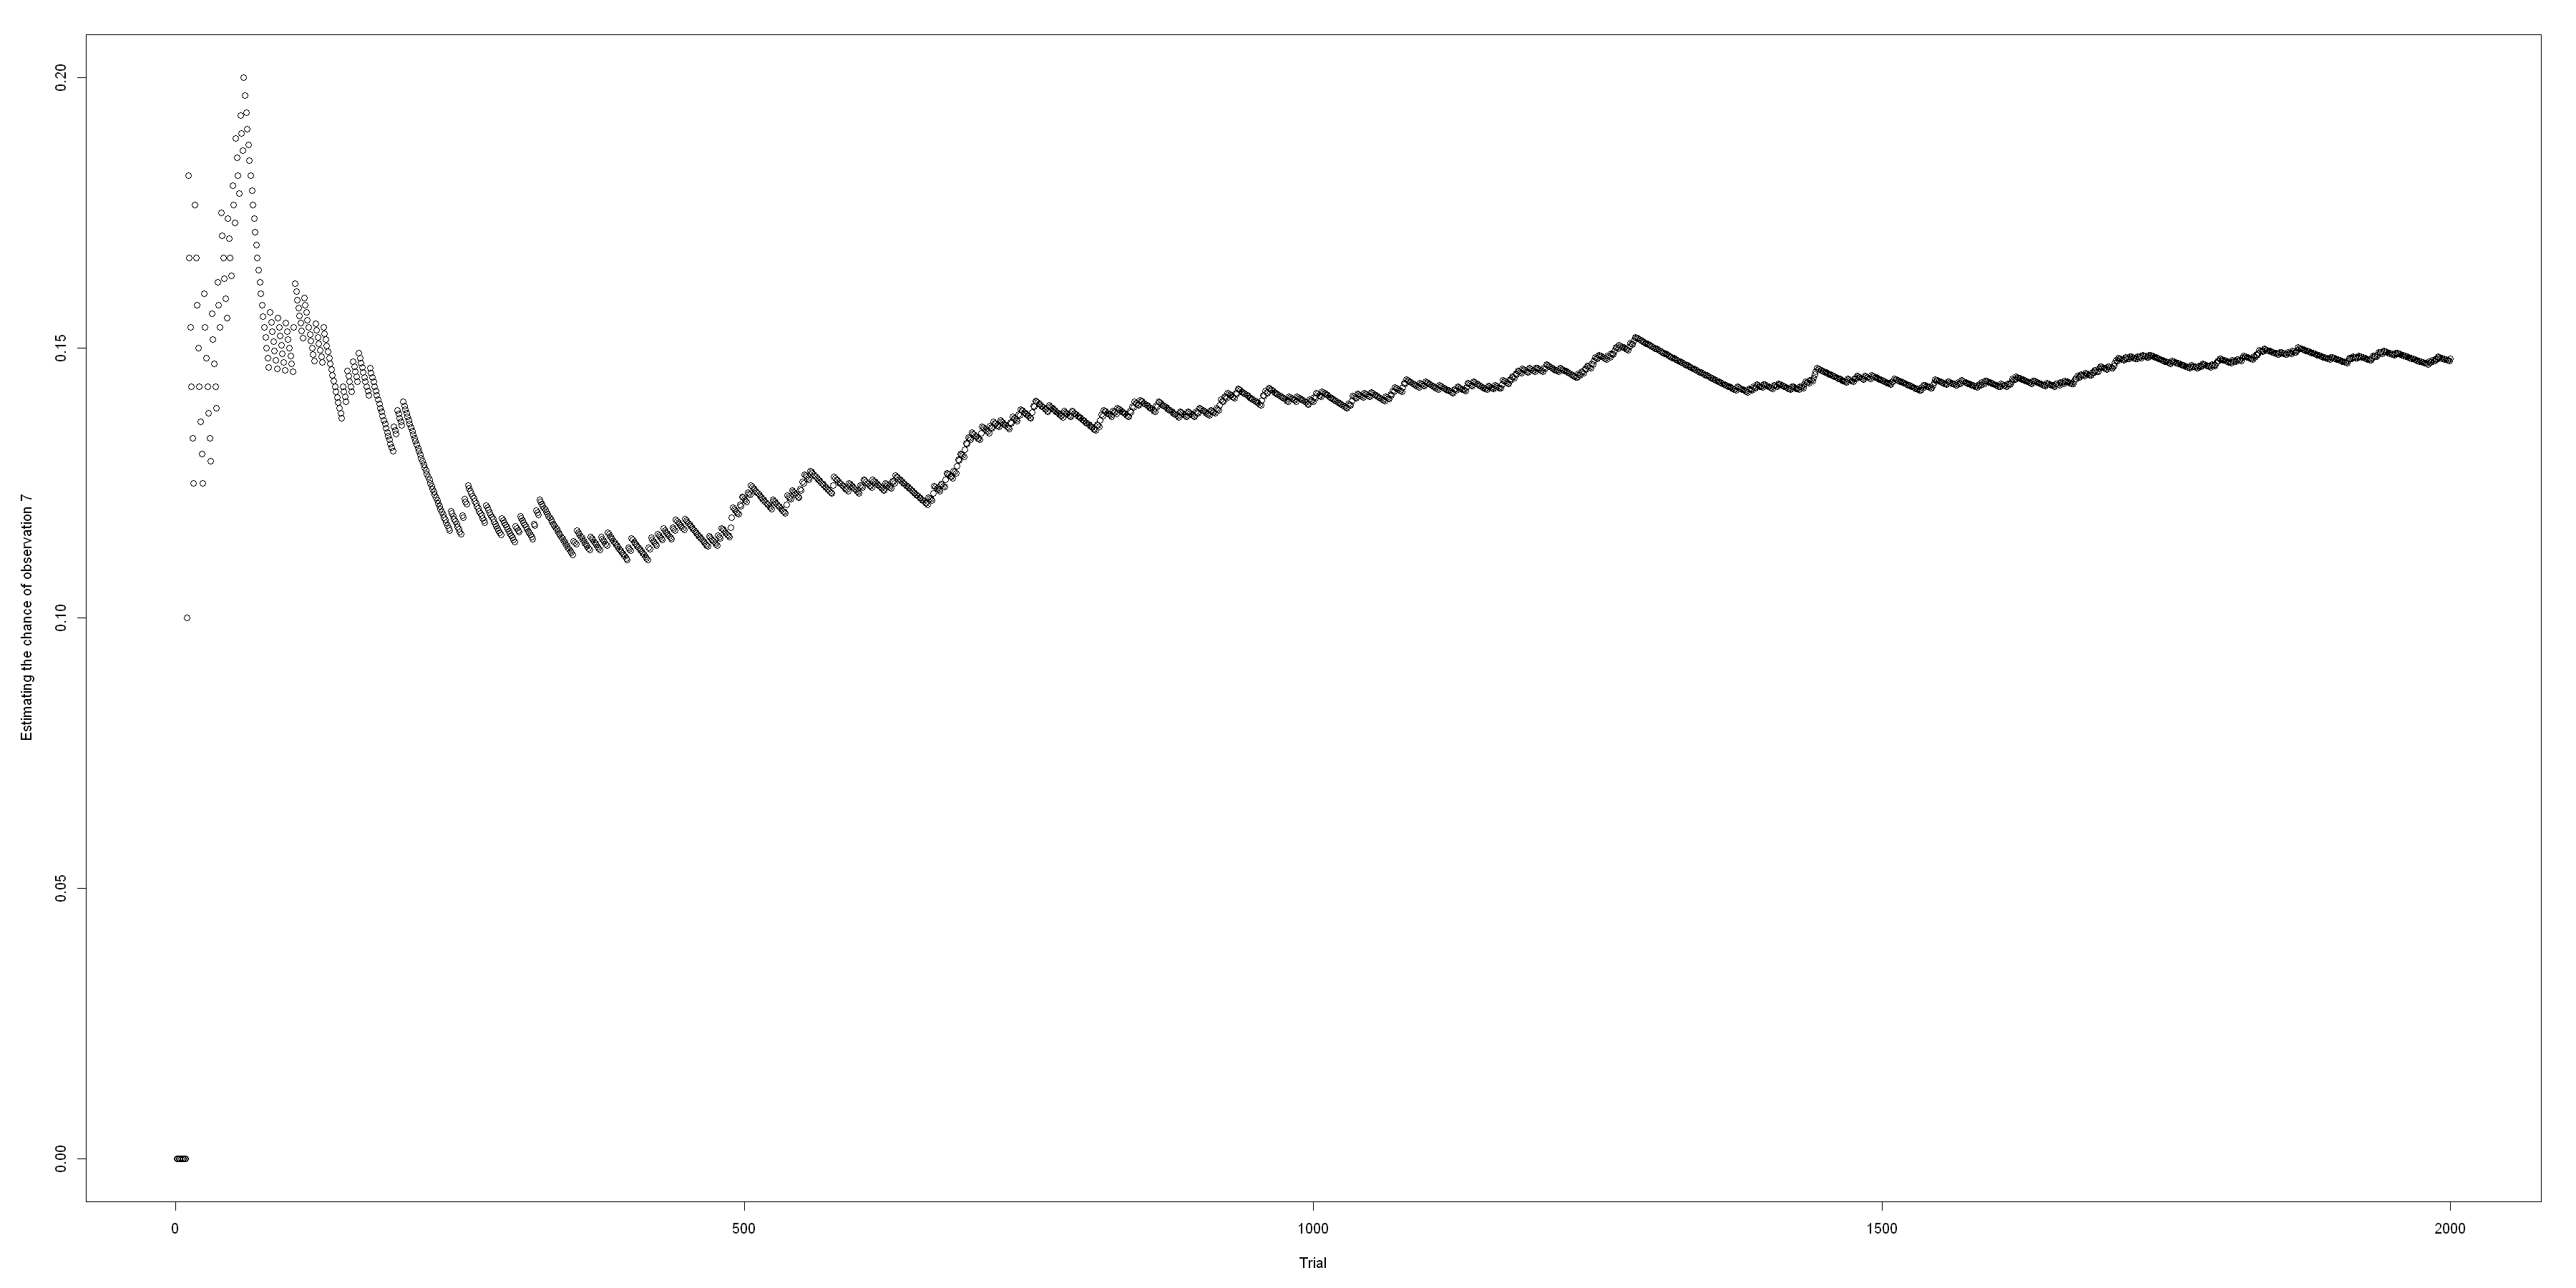

In [18]:
observations[, "n"] <- 0
results <- c()
for (i in 1:2000) {
  obs <- sum_of_n_dice(2)
  observations[toString(obs), "n"] <- observations[toString(obs), "n"] + 1
  result <- observations["7", "n"] / sum(observations[, "n"])
  resutls <- c(results, result)
}
par(mar = c(5, 5, 2, 2))
options(repr.plot.width = 30, repr.plot.height = 15)

plot(results, xlab = "Trial", ylab = "Estimating the chance of observation 7")


<font color='green' background-color: blue> To see the convergence more clearly, as well as to observe the difference in convergence paths in different attempts, we can repeat the above experiment several times and place the charts side by side. </font>

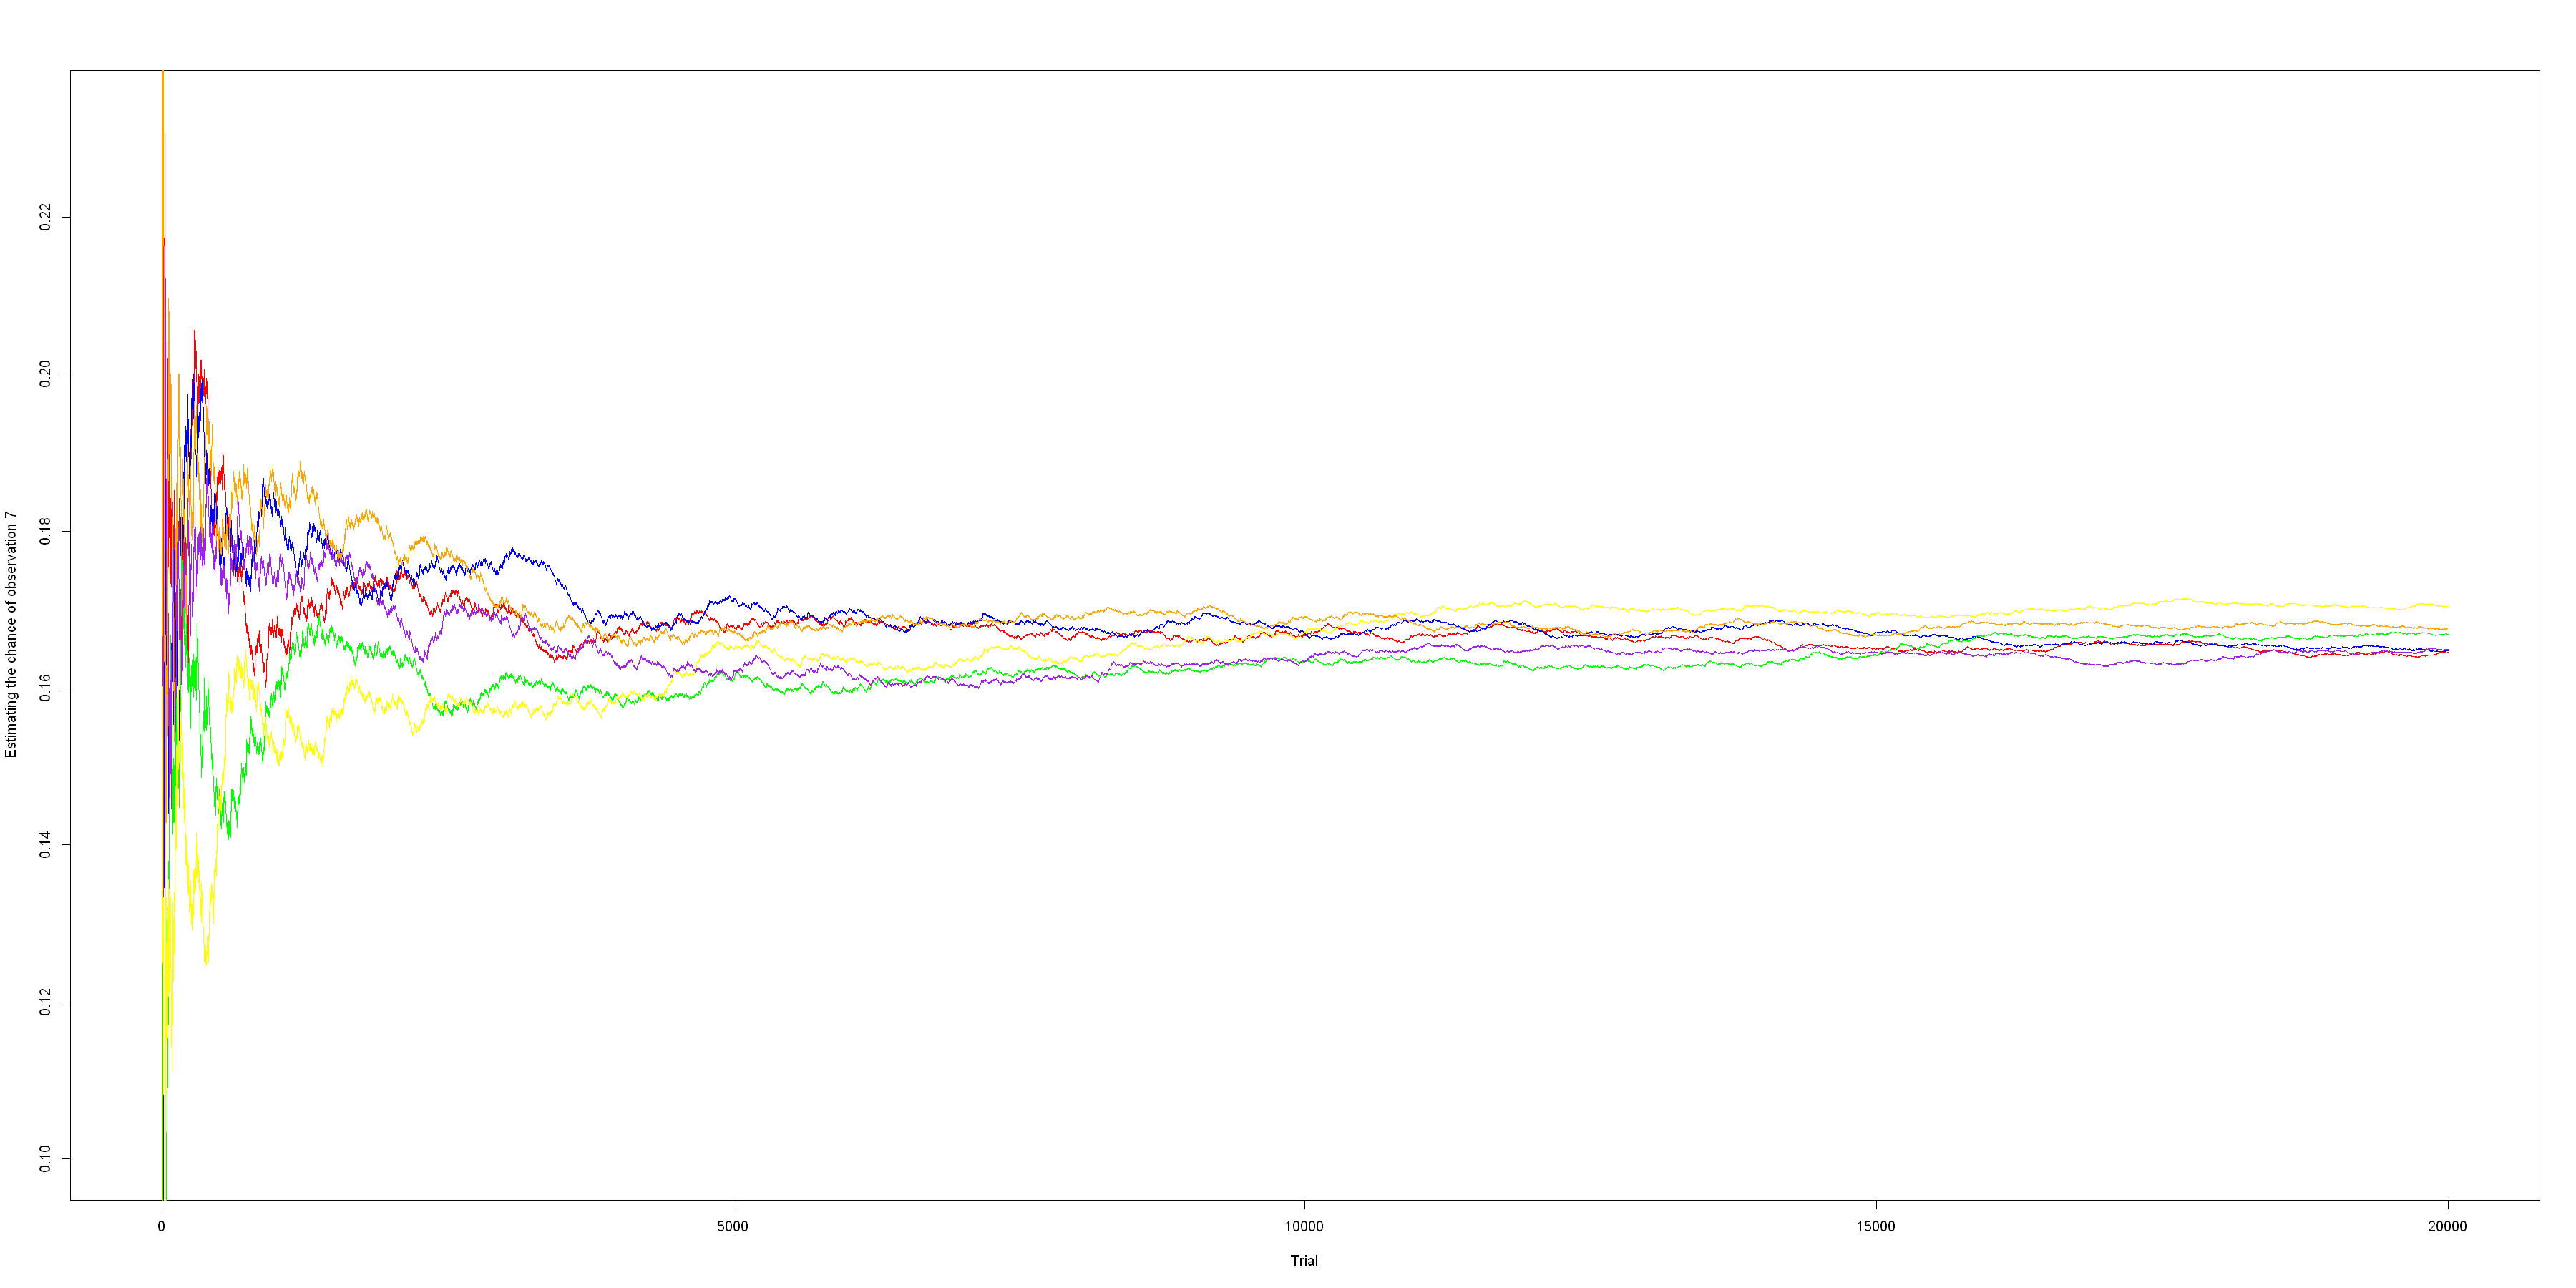

In [26]:
times <- 20000
colors <- c("red", "blue", "green", "yellow", "purple", "orange")
plot(rep(0.1667, times),
  xlab = "Trial", type = "l",
  ylab = "Estimating the chance of observation 7", col = "black"
)
for (k in 1:6) {
  observations[, "n"] <- 0
  results <- c()
  for (i in 1:times) {
    obs <- sum_of_n_dice(2)
    observations[toString(obs), "n"] <- observations[toString(obs), "n"] + 1
    result <- observations["7", "n"] / sum(observations[, "n"])
    resutls <- c(results, result)
  }
  lines(results, col = colors[k])
}
